In [32]:
import numpy as np
import pandas as pd
from sklearn.multiclass import OneVsRestClassifier
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, train_test_split
import matplotlib.pyplot as plt

In [33]:
data = load_wine()
X = data.data
y = data.target
description = data.DESCR
features = data.feature_names
y_names = data.target_names

In [34]:
print("Conjunto de dados (X):\n", X)
print("Rótulos (y):\n",  y)
print("Descrição do dataset:\n", data.DESCR)
print("Características (features):\n", data.feature_names)
print("Classes (target names):\n", data.target_names)

Conjunto de dados (X):
 [[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
Rótulos (y):
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Descrição do dataset:
 .. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predict

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=60)

In [36]:
param_grid = {
    'polynomialfeatures__degree': [1, 2, 3, 4, 5],
    'onevsrestclassifier__estimator__penalty': ['l1', 'l2'],
    'onevsrestclassifier__estimator__C': np.linspace(0.01, 0.99, 100)
}

In [37]:
poly_svm_linear = make_pipeline(
    PolynomialFeatures(),
    StandardScaler(),
    OneVsRestClassifier(LinearSVC(random_state=60, dual = False, max_iter= 10000))
)
grid_linear = RandomizedSearchCV(poly_svm_linear , param_distributions = param_grid, cv = 5, n_iter = 100)
grid_linear.fit(X_train, Y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('polynomialfeatures',
                                              PolynomialFeatures()),
                                             ('standardscaler',
                                              StandardScaler()),
                                             ('onevsrestclassifier',
                                              OneVsRestClassifier(estimator=LinearSVC(dual=False,
                                                                                      max_iter=10000,
                                                                                      random_state=60)))]),
                   n_iter=100,
                   param_distributions={'onevsrestclassifier__estimator__C': array([0.01      , 0.01989899, 0.02979798, 0.039696...
       0.75242424, 0.76232323, 0.77222222, 0.78212121, 0.7920202 ,
       0.80191919, 0.81181818, 0.82171717, 0.83161616, 0.84151515,
       0.85141414, 0.86131313, 0.87121212, 0.88111111, 0.8910101 ,
       0.90090909, 0.91080808, 0.92070707, 0.93060606, 0.94050505,
       0.95040404, 0.96030303, 0.97020202, 0.98010101, 0.99      ]),
                                        'onevsrestclassifier__estimator__penalty': ['l1',
                                                                                    'l2'],
                                        'polynomialfeatures__degree': [1, 2, 3,
                                                                       4, 5]})

In [38]:
print("Best parameters for LinearSVC:", grid_linear.best_params_)

Best parameters for LinearSVC: {'polynomialfeatures__degree': 5, 'onevsrestclassifier__estimator__penalty': 'l1', 'onevsrestclassifier__estimator__C': 0.9207070707070707}


In [39]:
pred = grid_linear.predict(X_test)
print("Mean Squared Error:", mean_squared_error(Y_test, pred))

Mean Squared Error: 0.05555555555555555


Classification Report for LinearSVC:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       0.93      0.93      0.93        15
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.94        36
weighted avg       0.95      0.94      0.94        36

Accuracy for LinearSVC: 0.9444444444444444


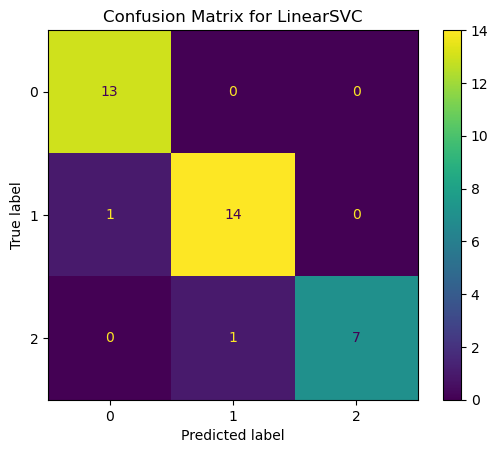

In [45]:
print("Classification Report for LinearSVC:\n", classification_report(Y_test, pred))
print("Accuracy for LinearSVC:", accuracy_score(Y_test, pred))
disp = ConfusionMatrixDisplay.from_predictions(Y_test, pred)
plt.title("Confusion Matrix for LinearSVC")
plt.show()

In [46]:
param_grid = {
    'onevsrestclassifier__estimator__degree': [1, 2, 3, 4, 5],
    'onevsrestclassifier__estimator__gamma': np.linspace(0.01, 0.99, 100),
    'onevsrestclassifier__estimator__C': np.linspace(0.01, 0.99, 100),
    'onevsrestclassifier__estimator__kernel': ['rbf', 'poly', 'sigmoid']
}

In [49]:
poly_svm = make_pipeline(
    StandardScaler(),
    OneVsRestClassifier(SVC(random_state=60, max_iter=10000, coef0 = 1))
)
grid = RandomizedSearchCV(poly_svm, param_distributions=param_grid, cv=5, n_iter=100)
grid.fit(X_train, Y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('onevsrestclassifier',
                                              OneVsRestClassifier(estimator=SVC(coef0=1,
                                                                                max_iter=10000,
                                                                                random_state=60)))]),
                   n_iter=100,
                   param_distributions={'onevsrestclassifier__estimator__C': array([0.01      , 0.01989899, 0.02979798, 0.03969697, 0.04959596,
       0.05949495, 0.06939394, 0.07929293, 0.0891...
       0.70292929, 0.71282828, 0.72272727, 0.73262626, 0.74252525,
       0.75242424, 0.76232323, 0.77222222, 0.78212121, 0.7920202 ,
       0.80191919, 0.81181818, 0.82171717, 0.83161616, 0.84151515,
       0.85141414, 0.86131313, 0.87121212, 0.88111111, 0.8910101 ,
       0.90090909, 0.91080808, 0.92070707, 0.93060606, 0.94050505,
       0.95040404, 0.96030303, 0.97020202, 0.98010101, 0.99      ]),
                                        'onevsrestclassifier__estimator__kernel': ['rbf',
                                                                                   'poly',
                                                                                   'sigmoid']})

In [50]:
print("Best parameters for SVC:", grid.best_params_)


Best parameters for SVC: {'onevsrestclassifier__estimator__kernel': 'rbf', 'onevsrestclassifier__estimator__gamma': 0.11888888888888888, 'onevsrestclassifier__estimator__degree': 4, 'onevsrestclassifier__estimator__C': 0.8019191919191919}


In [51]:
pred = grid.predict(X_test)
print("Mean Squared Error:", mean_squared_error(Y_test, pred))

Mean Squared Error: 0.0


Classification Report for SVC:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Accuracy for SVC: 1.0


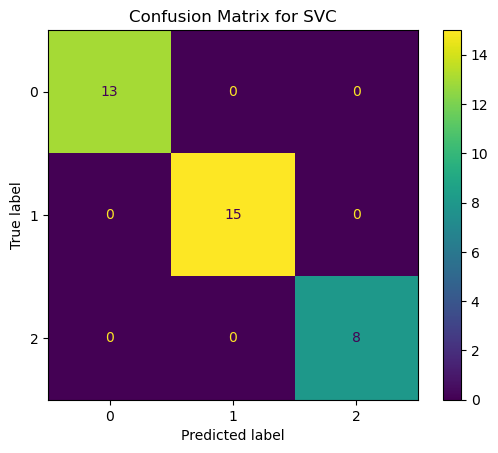

In [53]:
print("Classification Report for SVC:\n", classification_report(Y_test, pred))
print("Accuracy for SVC:", accuracy_score(Y_test, pred))
disp = ConfusionMatrixDisplay.from_predictions(Y_test, pred)
plt.title("Confusion Matrix for SVC")
plt.show()